In [51]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import scipy.stats as stats

# visualization
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
df_bitcoin = pd.read_csv("Bitcoin_data.csv")
df_bitcoin['Date'] = pd.to_datetime(df_bitcoin['Date'])
df_bitcoin.set_index('Date', inplace=True)
df_bitcoin.head(5)

,Unnamed: 0,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,,
2019-07-15,1,10257.84,11052.77,9992.01,10895.09,"25,384,047,207","194,147,627,475"
2019-07-14,2,11381.02,11451.20,10234.58,10256.06,"22,486,000,001","182,741,933,552"
2019-07-13,3,11813.13,11841.96,10908.48,11392.38,"21,042,616,384","202,968,191,001"
2019-07-12,4,11354.30,11905.49,11179.14,11815.99,"23,534,692,797","210,494,417,832"
2019-07-11,5,12139.71,12144.62,11158.92,11358.66,"28,595,327,690","202,324,174,692"


In [52]:
df_bitcoin.count()

Unnamed: 0    4539
Open          4539
High          4539
Low           4539
Close         4539
Volume        4539
Market Cap    4539
dtype: int64

In [58]:
df_bitcoin.dtypes

Unnamed: 0      int64
Open          float64
High          float64
Low           float64
Close         float64
Volume         object
Market Cap     object
change        float64
dtype: object

In [71]:
#df_bitcoin.Volume = df_bitcoin.Volume.astype(int)


In [72]:
df_bitcoin["Change"] = df_bitcoin.Close - df_bitcoin.Open
df_bitcoin

,Unnamed: 0,Open,High,Low,Close,Volume,Market Cap,change,Change
Date,,,,,,,,,
2019-07-15,1,10257.84,11052.77,9992.01,10895.09,"25,384,047,207","194,147,627,475",637.25,637.25
2019-07-14,2,11381.02,11451.20,10234.58,10256.06,"22,486,000,001","182,741,933,552",-1124.96,-1124.96
2019-07-13,3,11813.13,11841.96,10908.48,11392.38,"21,042,616,384","202,968,191,001",-420.75,-420.75
2019-07-12,4,11354.30,11905.49,11179.14,11815.99,"23,534,692,797","210,494,417,832",461.69,461.69
2019-07-11,5,12139.71,12144.62,11158.92,11358.66,"28,595,327,690","202,324,174,692",-781.05,-781.05
...,...,...,...,...,...,...,...,...,...
2013-05-01,2267,139.00,139.89,107.72,116.99,-,"1,298,954,594",-22.01,-22.01
2013-04-30,2268,144.00,146.93,134.05,139.00,-,"1,542,813,125",-5.00,-5.00
2013-04-29,2269,134.44,147.49,134.00,144.54,-,"1,603,768,865",10.10,10.10


In [73]:
max(df_bitcoin.index)


Timestamp('2019-07-15 00:00:00')

In [74]:
min(df_bitcoin.index)

Timestamp('2013-04-28 00:00:00')

In [77]:
df_bitcoin["Close"].plot

In [78]:
auto_correlations = df_bitcoin.corr()
auto_correlations

,Unnamed: 0,Open,High,Low,Close,change,Change
Unnamed: 0,1.000000,-0.713264,-0.707873,-0.722475,-0.713743,-0.017101,-0.017101
Open,-0.713264,1.000000,0.998881,0.998097,0.997579,-0.020478,-0.020478
High,-0.707873,0.998881,1.000000,0.997885,0.999080,0.017178,0.017178
Low,-0.722475,0.998097,0.997885,1.000000,0.998735,0.023485,0.023485
Close,-0.713743,0.997579,0.999080,0.998735,1.000000,0.049098,0.049098
change,-0.017101,-0.020478,0.017178,0.023485,0.049098,1.000000,1.000000
Change,-0.017101,-0.020478,0.017178,0.023485,0.049098,1.000000,1.000000


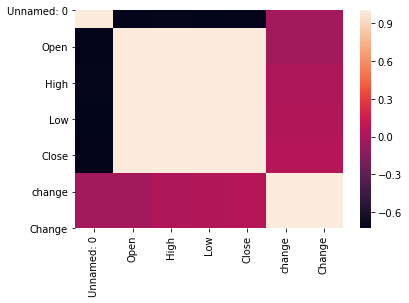

In [79]:
sns.heatmap(auto_correlations)